In [55]:
import numpy as np
import pandas as pd
import tensorflow as tf

SHUFFLE_BUFFER = 500
BATCH_SIZE = 2

In [56]:
csv_file = tf.keras.utils.get_file('heart.csv', 'https://storage.googleapis.com/download.tensorflow.org/data/heart.csv')

In [57]:
df = pd.read_csv(csv_file)

In [58]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


In [59]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal         object
target        int64
dtype: object

In [60]:
target = df.pop('target')

In [61]:
numeric_feature_names = ['age', 'thalach', 'trestbps',  'chol', 'oldpeak']
numeric_features = df[numeric_feature_names]
numeric_features.head()

,age,thalach,trestbps,chol,oldpeak
0,63,150,145,233,2.3
1,67,108,160,286,1.5
2,67,129,120,229,2.6
3,37,187,130,250,3.5
4,41,172,130,204,1.4


In [62]:
tf.convert_to_tensor(numeric_features)

<tf.Tensor: shape=(303, 5), dtype=float64, numpy=
array([[ 63. , 150. , 145. , 233. ,   2.3],
       [ 67. , 108. , 160. , 286. ,   1.5],
       [ 67. , 129. , 120. , 229. ,   2.6],
       ...,
       [ 65. , 127. , 135. , 254. ,   2.8],
       [ 48. , 150. , 130. , 256. ,   0. ],
       [ 63. , 154. , 150. , 407. ,   4. ]])>

In [63]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(numeric_features))

In [64]:
normalizer(numeric_features.iloc[:3])

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[ 0.93384   ,  0.03480783,  0.74578166, -0.26008663,  1.0680454 ],
       [ 1.3782114 , -1.7806157 ,  1.5923294 ,  0.75738776,  0.3802287 ],
       [ 1.3782114 , -0.87290394, -0.6651312 , -0.33687717,  1.3259766 ]],
      dtype=float32)>

In [65]:
def get_basic_model():
  model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

In [66]:
model = get_basic_model()
model.fit(numeric_features, target, epochs=15, batch_size=BATCH_SIZE)

Epoch 1/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7228 - loss: 0.6981
Epoch 2/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - accuracy: 0.7327 - loss: 0.5871
Epoch 3/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - accuracy: 0.7294 - loss: 0.5249
Epoch 4/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7393 - loss: 0.4876  
Epoch 5/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.7525 - loss: 0.4672
Epoch 6/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - accuracy: 0.7624 - loss: 0.4524
Epoch 7/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - accuracy: 0.7723 - loss: 0.4426
Epoch 8/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - accuracy: 0.7756 - loss: 0.4346
Epoch 9/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - accuracy: 0.7921 - loss: 0.4293
Epoch 10/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - accuracy: 0.7855 - loss: 0.4246
Epoch 11/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - accuracy: 0.7954 - loss: 0.4224
Epoch 12/15
152/152 ━━━━━━━━━━━━

In [67]:
numeric_dataset = tf.data.Dataset.from_tensor_slices((numeric_features, target))

for row in numeric_dataset.take(3):
  print(row)

(<tf.Tensor: shape=(5,), dtype=float64, numpy=array([ 63. , 150. , 145. , 233. ,   2.3])>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: shape=(5,), dtype=float64, numpy=array([ 67. , 108. , 160. , 286. ,   1.5])>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)
(<tf.Tensor: shape=(5,), dtype=float64, numpy=array([ 67. , 129. , 120. , 229. ,   2.6])>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)


In [68]:
numeric_batches = numeric_dataset.shuffle(1000).batch(BATCH_SIZE)

model = get_basic_model()
model.fit(numeric_batches, epochs=15)

Epoch 1/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7228 - loss: 0.6752
Epoch 2/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.7261 - loss: 0.5817
Epoch 3/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - accuracy: 0.7261 - loss: 0.5299
Epoch 4/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - accuracy: 0.7261 - loss: 0.5004
Epoch 5/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - accuracy: 0.7261 - loss: 0.4853
Epoch 6/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - accuracy: 0.7261 - loss: 0.4764
Epoch 7/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - accuracy: 0.7261 - loss: 0.4692
Epoch 8/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - accuracy: 0.7261 - loss: 0.4626
Epoch 9/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - accuracy: 0.7261 - loss: 0.4556
Epoch 10/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - accuracy: 0.7360 - loss: 0.4505
Epoch 11/15
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - accuracy: 0.7492 - loss: 0.4448
Epoch 12/15
152/152 ━━━━━━━━━━━━

In [69]:
numeric_features_dict = {key: value.to_numpy()[:, tf.newaxis] for key, value in dict(numeric_features).items()}
target_array =  target.to_numpy()[:, tf.newaxis]

In [70]:
numeric_dict_ds = tf.data.Dataset.from_tensor_slices((numeric_features_dict , target_array))

In [71]:
len(numeric_features_dict)

5

In [72]:
for row in numeric_dict_ds.take(3):
  print(row)

({'age': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([63])>, 'thalach': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([150])>, 'trestbps': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([145])>, 'chol': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([233])>, 'oldpeak': <tf.Tensor: shape=(1,), dtype=float64, numpy=array([2.3])>}, <tf.Tensor: shape=(1,), dtype=int64, numpy=array([0])>)
({'age': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([67])>, 'thalach': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([108])>, 'trestbps': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([160])>, 'chol': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([286])>, 'oldpeak': <tf.Tensor: shape=(1,), dtype=float64, numpy=array([1.5])>}, <tf.Tensor: shape=(1,), dtype=int64, numpy=array([1])>)
({'age': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([67])>, 'thalach': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([129])>, 'trestbps': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([120])

2025-11-21 16:47:15.242562: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [73]:
class MyModel(tf.keras.Model):
  def __init__(self):
    # Create all the internal layers in init.
    super().__init__()

    self.normalizer = tf.keras.layers.Normalization(axis=-1)

    self.seq = tf.keras.Sequential([
      self.normalizer,
      tf.keras.layers.Dense(10, activation='relu'),
      tf.keras.layers.Dense(10, activation='relu'),
      tf.keras.layers.Dense(1)
    ])

    self.concat = tf.keras.layers.Concatenate(axis=1)

  def _stack(self, input_dict):
    values = []
    for key, value in sorted(input_dict.items()):
      values.append(value)

    return self.concat(values)

  def adapt(self, inputs):
    # Stack the inputs and `adapt` the normalization layer.
    inputs = self._stack(inputs)
    self.normalizer.adapt(inputs)

  def call(self, inputs):
    # Stack the inputs
    inputs = self._stack(inputs)
    # Run them through all the layers.
    result = self.seq(inputs)

    return result

model = MyModel()

model.adapt(numeric_features_dict)

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'],
              run_eagerly=True)

In [74]:
model.fit(numeric_features_dict, target_array, epochs=5, batch_size=BATCH_SIZE)

Epoch 1/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.7261 - loss: 0.6029
Epoch 2/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.7261 - loss: 0.5260
Epoch 3/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.7261 - loss: 0.4945
Epoch 4/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.7261 - loss: 0.4774
Epoch 5/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.7261 - loss: 0.4676


In [75]:
numeric_dict_batches = numeric_dict_ds.shuffle(SHUFFLE_BUFFER).batch(BATCH_SIZE)
model.fit(numeric_dict_batches, epochs=5)

Epoch 1/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.7261 - loss: 0.4575
Epoch 2/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.7294 - loss: 0.4507
Epoch 3/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.7360 - loss: 0.4465
Epoch 4/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.7393 - loss: 0.4419
Epoch 5/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.7558 - loss: 0.4386


In [76]:
model.predict(dict(numeric_features.iloc[:3]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[-0.03781584],
       [ 0.5114445 ],
       [ 0.3599027 ]], dtype=float32)

In [77]:
inputs = {}
for name, column in numeric_features.items():
  inputs[name] = tf.keras.Input(
      shape=(1,), name=name, dtype=tf.float32)

inputs

{'age': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=age>,
 'thalach': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=thalach>,
 'trestbps': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=trestbps>,
 'chol': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=chol>,
 'oldpeak': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=oldpeak>}

In [78]:
xs = [value for key, value in sorted(inputs.items())]

concat = tf.keras.layers.Concatenate(axis=1)
x = concat(xs)

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.concatenate([value for key, value in sorted(numeric_features_dict.items())], axis=1))

x = normalizer(x)
x = tf.keras.layers.Dense(10, activation='relu')(x)
x = tf.keras.layers.Dense(10, activation='relu')(x)
x = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs, x)

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'],
              run_eagerly=True)

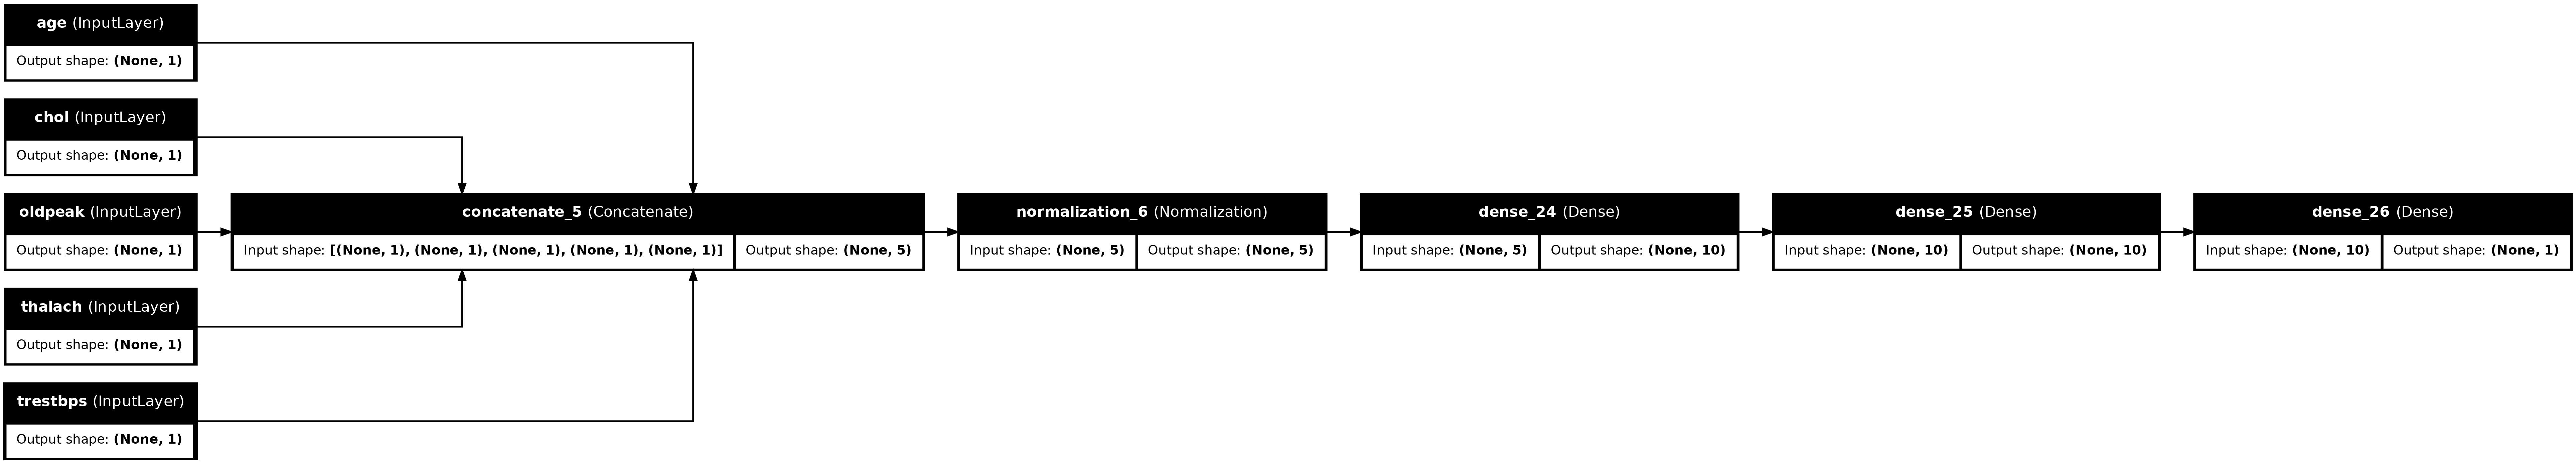

In [79]:
tf.keras.utils.plot_model(model, rankdir="LR", show_shapes=True,  show_layer_names=True)

In [80]:
model.fit(numeric_features_dict, target, epochs=5, batch_size=BATCH_SIZE)

Epoch 1/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.7195 - loss: 0.6272
Epoch 2/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.7261 - loss: 0.5356
Epoch 3/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.7261 - loss: 0.4964
Epoch 4/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.7294 - loss: 0.4743
Epoch 5/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.7393 - loss: 0.4628


In [81]:
numeric_dict_batches = numeric_dict_ds.shuffle(SHUFFLE_BUFFER).batch(BATCH_SIZE)
model.fit(numeric_dict_batches, epochs=5)

Epoch 1/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.7525 - loss: 0.4539
Epoch 2/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.7756 - loss: 0.4471
Epoch 3/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.7723 - loss: 0.4428
Epoch 4/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.7855 - loss: 0.4398
Epoch 5/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.7789 - loss: 0.4358


In [82]:
binary_feature_names = ['sex', 'fbs', 'exang']

In [83]:
categorical_feature_names = ['cp', 'restecg', 'slope', 'thal', 'ca']

In [84]:
inputs = {}
for name, column in df.items():
  if type(column[0]) == str:
    dtype = tf.string
  elif (name in categorical_feature_names or
        name in binary_feature_names):
    dtype = tf.int64
  else:
    dtype = tf.float32

  inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

In [85]:
inputs

{'age': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=age>,
 'sex': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, ragged=False, name=sex>,
 'cp': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, ragged=False, name=cp>,
 'trestbps': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=trestbps>,
 'chol': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=chol>,
 'fbs': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, ragged=False, name=fbs>,
 'restecg': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, ragged=False, name=restecg>,
 'thalach': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=thalach>,
 'exang': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, ragged=False, name=exang>,
 'oldpeak': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=oldpeak>,
 'slope': <KerasTensor shape=(None, 1), dtype=int64,

In [86]:
preprocessed = []

for name in binary_feature_names:
  inp = inputs[name]
  preprocessed.append(inp)

preprocessed

[<KerasTensor shape=(None, 1), dtype=int64, sparse=False, ragged=False, name=sex>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=False, ragged=False, name=fbs>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=False, ragged=False, name=exang>]

In [87]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.concatenate([value for key, value in sorted(numeric_features_dict.items())], axis=1))

In [88]:
numeric_inputs = []
for name in numeric_feature_names:
  numeric_inputs.append(inputs[name])

numeric_inputs = tf.keras.layers.Concatenate(axis=-1)(numeric_inputs)
numeric_normalized = normalizer(numeric_inputs)

preprocessed.append(numeric_normalized)

preprocessed

[<KerasTensor shape=(None, 1), dtype=int64, sparse=False, ragged=False, name=sex>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=False, ragged=False, name=fbs>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=False, ragged=False, name=exang>,
 <KerasTensor shape=(None, 5), dtype=float32, sparse=False, ragged=False, name=keras_tensor_57>]

In [89]:
vocab = ['a','b','c']
lookup = tf.keras.layers.StringLookup(vocabulary=vocab, output_mode='one_hot')
lookup(['c','a','a','b','zzz'])

<tf.Tensor: shape=(5, 4), dtype=int64, numpy=
array([[0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0]])>

In [90]:
vocab = [1,4,7,99]
lookup = tf.keras.layers.IntegerLookup(vocabulary=vocab, output_mode='one_hot')

lookup([-1,4,1])

<tf.Tensor: shape=(3, 5), dtype=int64, numpy=
array([[1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0]])>

In [91]:
for name in categorical_feature_names:
  vocab = sorted(set(df[name]))
  print(f'name: {name}')
  print(f'vocab: {vocab}\n')

  if type(vocab[0]) is str:
    lookup = tf.keras.layers.StringLookup(vocabulary=vocab, output_mode='one_hot')
  else:
    lookup = tf.keras.layers.IntegerLookup(vocabulary=vocab, output_mode='one_hot')

  x = inputs[name]
  x = lookup(x)
  preprocessed.append(x)

name: cp
vocab: [0, 1, 2, 3, 4]

name: restecg
vocab: [0, 1, 2]

name: slope
vocab: [1, 2, 3]

name: thal
vocab: ['1', '2', 'fixed', 'normal', 'reversible']

name: ca
vocab: [0, 1, 2, 3]



In [92]:
preprocessed

[<KerasTensor shape=(None, 1), dtype=int64, sparse=False, ragged=False, name=sex>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=False, ragged=False, name=fbs>,
 <KerasTensor shape=(None, 1), dtype=int64, sparse=False, ragged=False, name=exang>,
 <KerasTensor shape=(None, 5), dtype=float32, sparse=False, ragged=False, name=keras_tensor_57>,
 <KerasTensor shape=(None, 6), dtype=float32, sparse=False, ragged=False, name=keras_tensor_58>,
 <KerasTensor shape=(None, 4), dtype=float32, sparse=False, ragged=False, name=keras_tensor_59>,
 <KerasTensor shape=(None, 4), dtype=float32, sparse=False, ragged=False, name=keras_tensor_60>,
 <KerasTensor shape=(None, 6), dtype=float32, sparse=False, ragged=False, name=keras_tensor_61>,
 <KerasTensor shape=(None, 5), dtype=float32, sparse=False, ragged=False, name=keras_tensor_62>]

In [93]:
preprocessed_result = tf.keras.layers.Concatenate(axis=1)(preprocessed)
preprocessed_result

<KerasTensor shape=(None, 33), dtype=float32, sparse=False, ragged=False, name=keras_tensor_63>

In [94]:
preprocessor = tf.keras.Model(inputs, preprocessed_result)

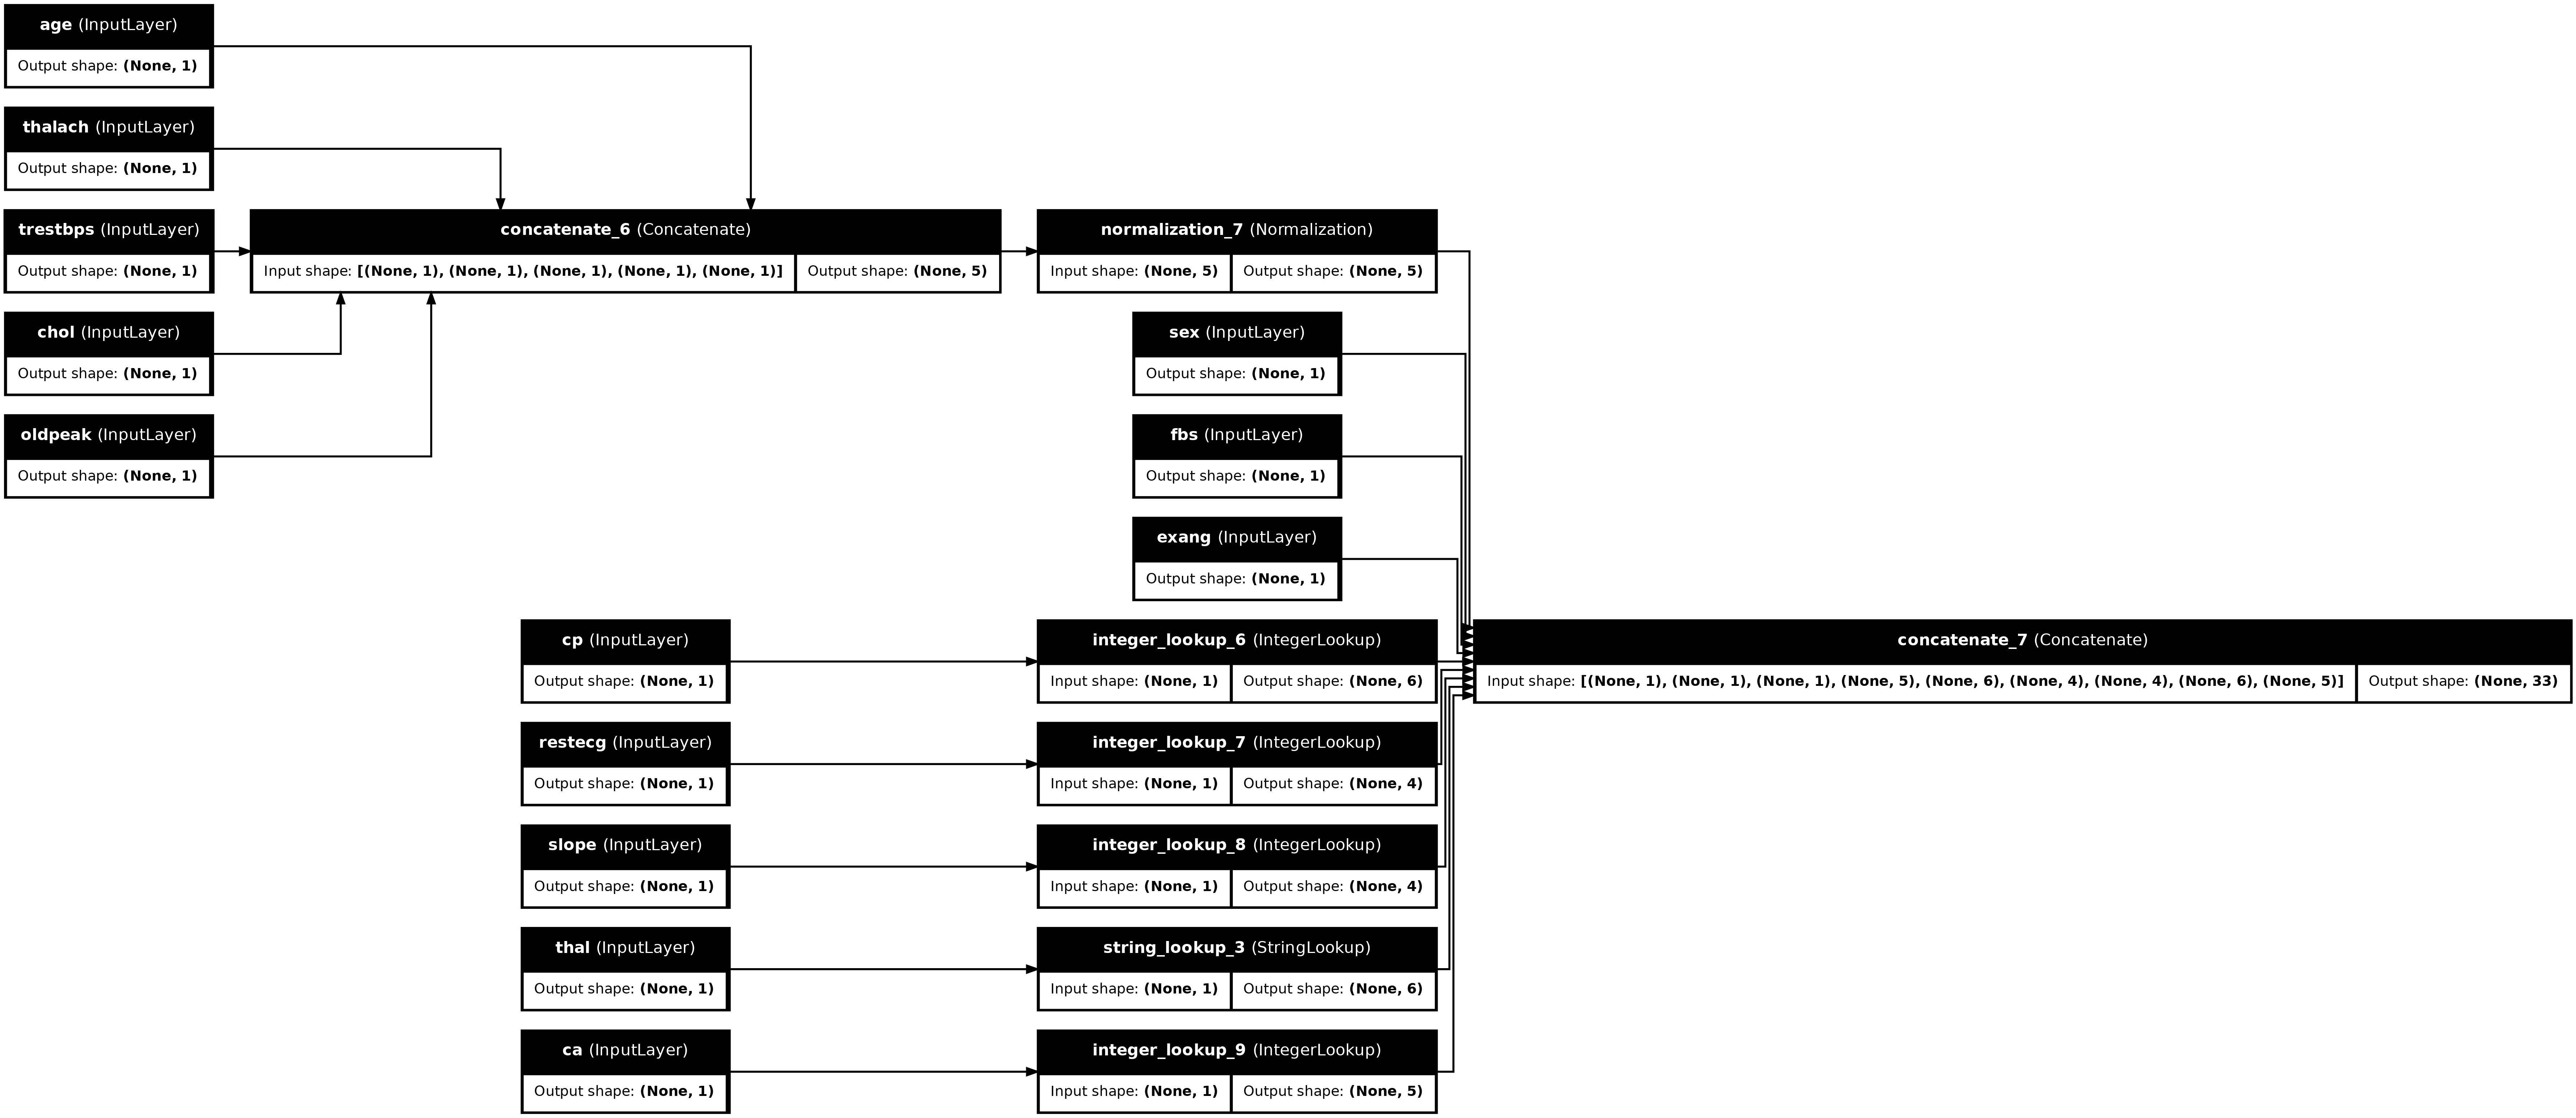

In [95]:
tf.keras.utils.plot_model(preprocessor, rankdir="LR", show_shapes=True,  show_layer_names=True)

In [96]:
preprocessor(dict(df.iloc[:1]))

<tf.Tensor: shape=(1, 33), dtype=float32, numpy=
array([[  1.       ,   1.       ,   0.       ,   0.93384  ,  -1.8534899,
        123.75736  ,   3.6224306,  -7.3077087,   0.       ,   0.       ,
          1.       ,   0.       ,   0.       ,   0.       ,   0.       ,
          0.       ,   0.       ,   1.       ,   0.       ,   0.       ,
          0.       ,   1.       ,   0.       ,   0.       ,   0.       ,
          1.       ,   0.       ,   0.       ,   0.       ,   1.       ,
          0.       ,   0.       ,   0.       ]], dtype=float32)>

In [97]:
body = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(1)
])

In [98]:
inputs

{'age': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=age>,
 'sex': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, ragged=False, name=sex>,
 'cp': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, ragged=False, name=cp>,
 'trestbps': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=trestbps>,
 'chol': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=chol>,
 'fbs': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, ragged=False, name=fbs>,
 'restecg': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, ragged=False, name=restecg>,
 'thalach': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=thalach>,
 'exang': <KerasTensor shape=(None, 1), dtype=int64, sparse=False, ragged=False, name=exang>,
 'oldpeak': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=oldpeak>,
 'slope': <KerasTensor shape=(None, 1), dtype=int64,

In [99]:
x = preprocessor(inputs)
x

<KerasTensor shape=(None, 33), dtype=float32, sparse=False, ragged=False, name=keras_tensor_64>

In [100]:
result = body(x)
result

<KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=keras_tensor_69>

In [101]:
model = tf.keras.Model(inputs, result)

model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])

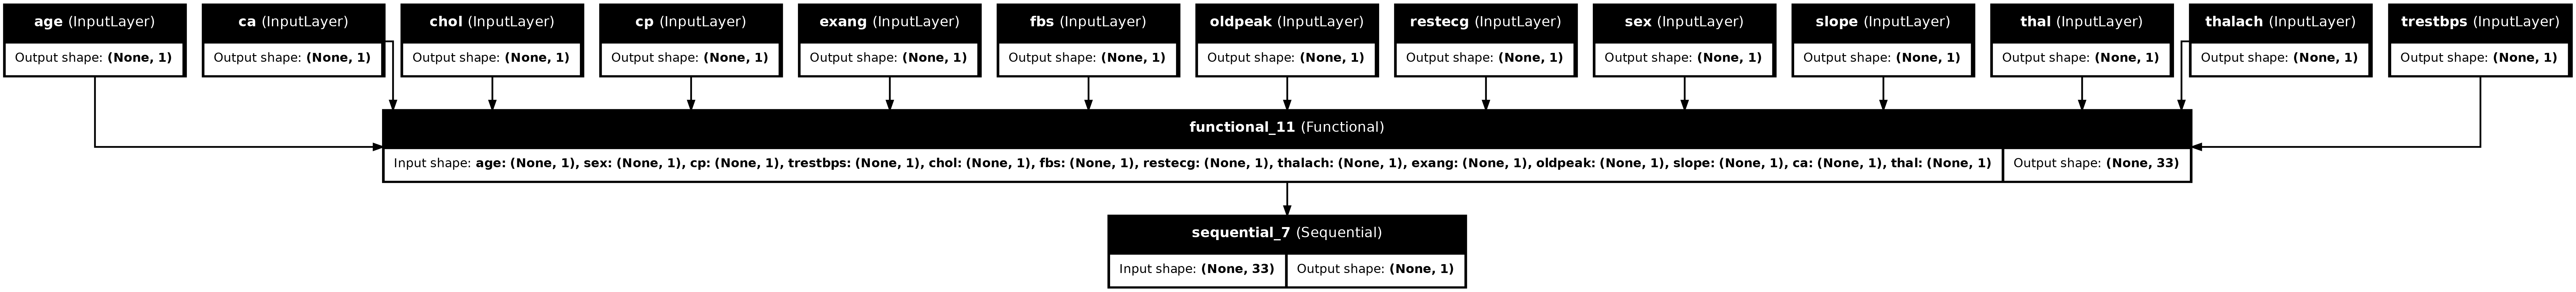

In [102]:
tf.keras.utils.plot_model(model, show_shapes=True,  show_layer_names=True)

In [134]:
history = model.fit(dict(df), target, epochs=5, batch_size=BATCH_SIZE)

ValueError: Invalid dtype: object

In [104]:
ds = tf.data.Dataset.from_tensor_slices((
    dict(df),
    target
))

ds = ds.batch(BATCH_SIZE)

In [105]:
import pprint

for x, y in ds.take(1):
  pprint.pprint(x)
  print()
  print(y)

{'age': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([63, 67])>,
 'ca': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([0, 3])>,
 'chol': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([233, 286])>,
 'cp': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([1, 4])>,
 'exang': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([0, 1])>,
 'fbs': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([1, 0])>,
 'oldpeak': <tf.Tensor: shape=(2,), dtype=float64, numpy=array([2.3, 1.5])>,
 'restecg': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([2, 2])>,
 'sex': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([1, 1])>,
 'slope': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([3, 2])>,
 'thal': <tf.Tensor: shape=(2,), dtype=string, numpy=array([b'fixed', b'normal'], dtype=object)>,
 'thalach': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([150, 108])>,
 'trestbps': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([145, 160])>}

tf.Tensor([0 1], shape=(2,), dtype=int64)


In [106]:
history = model.fit(ds, epochs=5)

Epoch 1/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7294 - loss: 0.6040
Epoch 2/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7360 - loss: 0.5496
Epoch 3/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7459 - loss: 0.4966
Epoch 4/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7492 - loss: 0.4599
Epoch 5/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7723 - loss: 0.4330
